## 1. Dataset Selection:

In [60]:
#Importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Reading the diabetic dataset from the UCI Archive
data = pd.read_csv("diabetic_data.csv")
print(data.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [3]:
#This function will let us view the descriptive statistics of all the numeric columns
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

We can see that there are 101766 records and 50 attributes considered.

## 2. Data Pre-processing:

Handling missing values
<br>Let's look at Weight, Payer code, and the Medical_specialty of the admitting doctor

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64


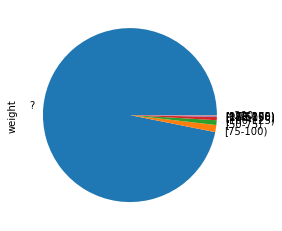

In [6]:
#Observe the distribution of the weight column
data['weight'].value_counts().plot.pie()
print(data_weight)

In [24]:
#It's obvious that there isn't much valuable data available in this column. It can be deleted.
data.drop('weight',axis = 1, inplace=True)
print(data)

        encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    

<AxesSubplot:ylabel='medical_specialty'>

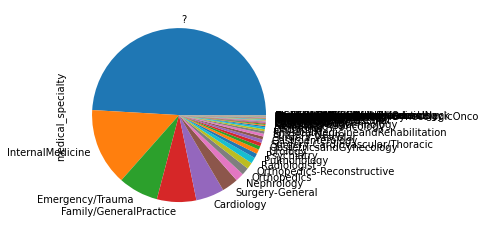

In [8]:
#Observe the distribution of the medical_specialty column
data['medical_specialty'].value_counts().plot.pie()

In [10]:
data['medical_specialty'].value_counts().head(10)

?                             49949
InternalMedicine              14635
Emergency/Trauma               7565
Family/GeneralPractice         7440
Cardiology                     5352
Surgery-General                3099
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Radiologist                    1140
Name: medical_specialty, dtype: int64

In [35]:
#This column has about 50% useful data. We can set '?' to 'Unknown' and use what is available.
data_medical_specialty = data.loc[data['medical_specialty']=='?', 'medical_specialty'] = "Unknown"
print(data['medical_specialty'])

0         Pediatrics-Endocrinology
1                          Unknown
2                          Unknown
3                          Unknown
4                          Unknown
                    ...           
101761                     Unknown
101762                     Unknown
101763                     Unknown
101764             Surgery-General
101765                     Unknown
Name: medical_specialty, Length: 101766, dtype: object


<AxesSubplot:ylabel='payer_code'>

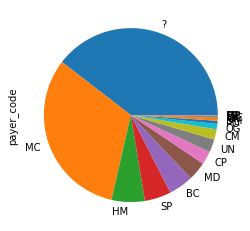

In [25]:
#Observe the Payer Code distribution
data['payer_code'].value_counts().plot.pie()

In [26]:
#Payer code can be removed because it doesn't seem to have anything useful to offer
data.drop('payer_code',axis = 1, inplace=True)
print(data)

        encounter_id  patient_nbr             race  gender      age  \
0            2278392      8222157        Caucasian  Female   [0-10)   
1             149190     55629189        Caucasian  Female  [10-20)   
2              64410     86047875  AfricanAmerican  Female  [20-30)   
3             500364     82442376        Caucasian    Male  [30-40)   
4              16680     42519267        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    

## 3. Data Exploration:

In [ ]:
#Calculate Mean, Median

In [ ]:
#Calculate Value counts


In [42]:
#1. What is the distribution of readmission outcomes? How many patients were readmitted vs. not readmitted?
#data1 = pd.read_csv("diabetic_data.csv")
readmitted_data = data['readmitted'].apply(lambda x: "Readmitted" if x =='>30' or x == '<30' else "Not readmitted")
readmitted_data.value_counts()

Not readmitted    54864
Readmitted        46902
Name: readmitted, dtype: int64

In [50]:
#2. What are the demographic characteristics of the patients in terms of age, gender, and ethnicity?
#age
data['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

<AxesSubplot:ylabel='age'>

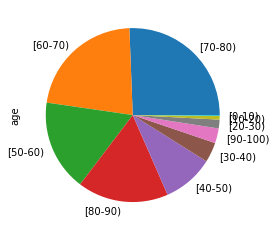

In [52]:
data['age'].value_counts().plot.pie()

<AxesSubplot:>

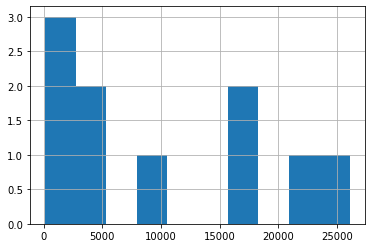

In [58]:
data['age'].value_counts().hist()

In [54]:
#gender
data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

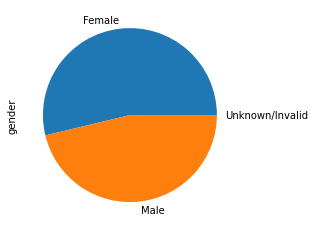

In [57]:
data['gender'].value_counts().plot.pie()

In [45]:
#ethnicity
data['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

<AxesSubplot:ylabel='race'>

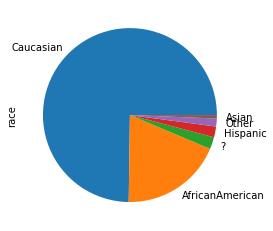

In [47]:
#Pie chart of the demographics
data['race'].value_counts().plot.pie()

<AxesSubplot:>

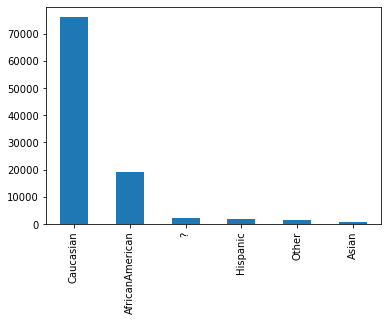

In [48]:
#Bar plot of the demographics
data['race'].value_counts().plot.bar()

In [82]:
data[(data['age'] == '[0-10)') & (data['gender'] == 'Female')].count()

encounter_id                83
patient_nbr                 83
race                        83
gender                      83
age                         83
admission_type_id           83
discharge_disposition_id    83
admission_source_id         83
time_in_hospital            83
medical_specialty           83
num_lab_procedures          83
num_procedures              83
num_medications             83
number_outpatient           83
number_emergency            83
number_inpatient            83
diag_1                      83
diag_2                      83
diag_3                      83
number_diagnoses            83
max_glu_serum               83
A1Cresult                   83
metformin                   83
repaglinide                 83
nateglinide                 83
chlorpropamide              83
glimepiride                 83
acetohexamide               83
glipizide                   83
glyburide                   83
tolbutamide                 83
pioglitazone                83
rosiglit

In [64]:
data1 = pd.read_csv("diabetic_data.csv")
cols_list = ['age','gender']
data1 = data1[cols_list]
data1.groupby('age').count()

,gender
age,
[0-10),161
[10-20),691
[20-30),1657
[30-40),3775
[40-50),9685
[50-60),17256
[60-70),22483
[70-80),26068
[80-90),17197


In [203]:
#What are the common primary diagnoses and procedures associated with hospital readmissions?
data2 = pd.read_csv("diabetic_data.csv")
cols_list = ['readmitted','diag_1','num_lab_procedures','num_procedures','time_in_hospital']
data2 = data2[cols_list]
data2.loc[data2['readmitted'] =='>30', 'readmitted'] = "readmitted"
data2.loc[data2['readmitted'] =='<30', 'readmitted'] = "readmitted"
data2 = data2[(data2['readmitted'] == 'readmitted')]
#Primary Diagnosis
data2['diag_1'].value_counts().head(15)

428      4057
414      2720
786      1709
486      1683
410      1438
491      1360
427      1226
996      1035
276       970
682       957
780       921
434       917
250.8     881
599       788
715       783
Name: diag_1, dtype: int64

In [204]:
#number of lab procedures
data2['num_lab_procedures'].value_counts().head(15)

43    1337
1     1308
44    1170
45    1105
46    1019
42    1005
40     997
41     991
39     970
49     965
38     950
37     946
48     935
47     930
36     918
Name: num_lab_procedures, dtype: int64

In [205]:
corr = data2.corr()
print(corr)

                    num_lab_procedures  num_procedures  time_in_hospital
num_lab_procedures            1.000000        0.074300          0.294811
num_procedures                0.074300        1.000000          0.217432
time_in_hospital              0.294811        0.217432          1.000000


In [95]:
#number of lab procedures
data2['num_procedures'].value_counts().head(15)

0    22516
1     9558
2     5641
3     4008
6     2045
4     1840
5     1294
Name: num_procedures, dtype: int64

In [109]:
#How does the length of stay vary for readmitted patients compared to non-readmitted patients?
#(Find the mean, median, and standard deviation of the “time_in_hospital” for each of the three categories of the “readmitted” column).

#The mean of time in hospital for readmitted patients
data2['time_in_hospital'].mean()

4.56157519935184

In [108]:
#The median of time in hospital for readmitted patients
data2['time_in_hospital'].median()

4.0

In [110]:
#The std deviation of time in hospital for readmitted patients
data2['time_in_hospital'].std()

3.0000663476179366

In [116]:
#For non-readmitted patients,
data3 = pd.read_csv("diabetic_data.csv")
cols_list = ['readmitted','time_in_hospital']
data3 = data3[cols_list]
data3.loc[data3['readmitted'] =='>30', 'readmitted'] = "readmitted"
data3.loc[data3['readmitted'] =='<30', 'readmitted'] = "readmitted"
data3 = data3[(data3['readmitted'] != 'readmitted')]

In [117]:
#The mean of time in hospital for non-readmitted patients
data3['time_in_hospital'].mean()

4.254429133858268

In [118]:
#The median of time in hospital for non-readmitted patients
data3['time_in_hospital'].median()

3.0

In [119]:
##The std deviation of time in hospital for non-readmitted patients
data3['time_in_hospital'].std()

2.964964487584448

In [121]:
#Are there specific medications or treatments from the list below that are more frequently associated with readmissions?
data3 = pd.read_csv("diabetic_data.csv")
cols_list = ['readmitted','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
data3 = data3[cols_list]
data3.loc[data3['readmitted'] =='>30', 'readmitted'] = "readmitted"
data3.loc[data3['readmitted'] =='<30', 'readmitted'] = "readmitted"
data3 = data3[(data3['readmitted'] == 'readmitted')]


In [127]:
data3['metformin'].value_counts()

No        38257
Steady     7951
Up          435
Down        259
Name: metformin, dtype: int64

In [123]:
data3['repaglinide'].value_counts()

No        46057
Steady      770
Up           53
Down         22
Name: repaglinide, dtype: int64

In [124]:
data3['nateglinide'].value_counts()

No        46560
Steady      326
Up           11
Down          5
Name: nateglinide, dtype: int64

In [125]:
data3['chlorpropamide'].value_counts()

No        46863
Steady       34
Up            5
Name: chlorpropamide, dtype: int64

In [128]:
data3['glimepiride'].value_counts()

No        44465
Steady     2205
Up          139
Down         93
Name: glimepiride, dtype: int64

In [129]:
data3['acetohexamide'].value_counts()

No        46901
Steady        1
Name: acetohexamide, dtype: int64

In [130]:
data3['glipizide'].value_counts()

No        40720
Steady     5501
Up          385
Down        296
Name: glipizide, dtype: int64

In [131]:
data3['glyburide'].value_counts()

No        42052
Steady     4216
Up          359
Down        275
Name: glyburide, dtype: int64

In [132]:
data3['tolbutamide'].value_counts()

No        46894
Steady        8
Name: tolbutamide, dtype: int64

In [133]:
data3['pioglitazone'].value_counts()

No        43371
Steady     3347
Up          121
Down         63
Name: pioglitazone, dtype: int64

In [134]:
data3['rosiglitazone'].value_counts()

No        43828
Steady     2976
Up           71
Down         27
Name: rosiglitazone, dtype: int64

In [135]:
data3['acarbose'].value_counts()

No        46719
Steady      175
Up            6
Down          2
Name: acarbose, dtype: int64

In [136]:
data3['miglitol'].value_counts()

No        46878
Steady       18
Down          5
Up            1
Name: miglitol, dtype: int64

In [137]:
data3['troglitazone'].value_counts()

No        46900
Steady        2
Name: troglitazone, dtype: int64

In [138]:
data3['tolazamide'].value_counts()

No        46889
Steady       12
Up            1
Name: tolazamide, dtype: int64

In [139]:
data3['examide'].value_counts()

No    46902
Name: examide, dtype: int64

In [140]:
data3['citoglipton'].value_counts()

No    46902
Name: citoglipton, dtype: int64

In [141]:
data3['insulin'].value_counts()

No        20705
Steady    13915
Down       6450
Up         5832
Name: insulin, dtype: int64

In [142]:
data3['glyburide-metformin'].value_counts()

No        46566
Steady      334
Down          1
Up            1
Name: glyburide-metformin, dtype: int64

In [143]:
data3['glipizide-metformin'].value_counts()

No        46894
Steady        8
Name: glipizide-metformin, dtype: int64

In [144]:
data3['glimepiride-pioglitazone'].value_counts()

No        46901
Steady        1
Name: glimepiride-pioglitazone, dtype: int64

In [145]:
data3['metformin-rosiglitazone'].value_counts()

No    46902
Name: metformin-rosiglitazone, dtype: int64

In [146]:
data3['metformin-pioglitazone'].value_counts()

No    46902
Name: metformin-pioglitazone, dtype: int64

In [193]:
#Is there a correlation between certain patient characteristics (e.g., race, gender, age and the likelihood of readmission?
data2 = pd.read_csv("diabetic_data.csv")
cols_list = ['readmitted','age','gender','race']
data2 = data2[cols_list]
data2.loc[data2['readmitted'] =='>30', 'readmitted'] = "readmitted"
data2.loc[data2['readmitted'] =='<30', 'readmitted'] = "readmitted"
data2 = data2[(data2['readmitted'] == 'readmitted')]
cols_list = ['age','gender','race']
data2 = data2[cols_list]
print(data2)

            age  gender             race
1       [10-20)  Female        Caucasian
5       [50-60)    Male        Caucasian
7       [70-80)    Male        Caucasian
10      [40-50)  Female  AfricanAmerican
11      [60-70)    Male  AfricanAmerican
...         ...     ...              ...
101754  [70-80)  Female        Caucasian
101755  [40-50)  Female            Other
101756  [60-70)  Female            Other
101760  [60-70)  Female  AfricanAmerican
101761  [70-80)    Male  AfricanAmerican

[46902 rows x 3 columns]


In [194]:
data2['age'].value_counts()

[70-80)     12544
[60-70)     10399
[80-90)      8301
[50-60)      7585
[40-50)      4305
[30-40)      1611
[90-100)     1118
[20-30)       746
[10-20)       264
[0-10)         29
Name: age, dtype: int64

In [195]:
data2['gender'].value_counts()

Female    25670
Male      21232
Name: gender, dtype: int64

In [196]:
data2['race'].value_counts()

Caucasian          35716
AfricanAmerican     8789
Hispanic             854
?                    726
Other                591
Asian                226
Name: race, dtype: int64

In [197]:
data2['race'].replace({'Caucasian': 1, 'AfricanAmerican': 2,'Hispanic': 3, '?': 4, 'Other': 5, 'Asian': 6})

1         1
5         1
7         1
10        2
11        2
         ..
101754    1
101755    5
101756    5
101760    2
101761    2
Name: race, Length: 46902, dtype: int64

In [198]:
data2['age'].replace({'[0-10)': 1, '[10-20)': 2,'[20-30)': 3, '[30-40)': 4, '[40-50)': 5, '[50-60)': 6, '[60-70)': 7, '[70-80)': 8, '[80-90)': 9, '[90-100)': 10 }).astype(int)

1         2
5         6
7         8
10        5
11        7
         ..
101754    8
101755    5
101756    7
101760    7
101761    8
Name: age, Length: 46902, dtype: int32

In [211]:
data2['gender']
data2['gender'].replace({'Female': 1, 'Male': 2}).astype(int)

KeyError: 'gender'

In [201]:
corr=data2.corr()
print(corr)

Empty DataFrame
Columns: []
Index: []


In [202]:
#Which “medical_specialty” is most often associated with readmitted patients??
data2 = pd.read_csv("diabetic_data.csv")
cols_list = ['readmitted','medical_specialty']
data2 = data2[cols_list]
data2.loc[data2['readmitted'] =='>30', 'readmitted'] = "readmitted"
data2.loc[data2['readmitted'] =='<30', 'readmitted'] = "readmitted"
data2 = data2[(data2['readmitted'] == 'readmitted')]
data2['medical_specialty'].value_counts()

?                                   23997
InternalMedicine                     6369
Emergency/Trauma                     3852
Family/GeneralPractice               3546
Cardiology                           2278
                                    ...  
SportsMedicine                          1
Pediatrics-EmergencyMedicine            1
Pediatrics-Hematology-Oncology          1
Surgery-PlasticwithinHeadandNeck        1
DCPTEAM                                 1
Name: medical_specialty, Length: 68, dtype: int64

In [212]:
#What is the correlation of “num_lab_procedures” with the readmission rates?
data2 = pd.read_csv("diabetic_data.csv")
cols_list = ['readmitted','num_lab_procedures']
data2 = data2[cols_list]
data2['readmitted']
data2['readmitted'].replace({'<30': 1, '>30': 2, 'NO':3}, inplace = True)
data2['readmitted'].value_counts()
corr = data2.corr()
print(corr)

                    readmitted  num_lab_procedures
readmitted            1.000000           -0.037976
num_lab_procedures   -0.037976            1.000000


In [42]:
#Hypothesis-1: A1Cresult is an important factor
data_A1Cresult = data['A1Cresult'].value_counts()
print(data_A1Cresult)

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64


In [230]:
data2 = pd.read_csv("diabetic_data.csv")
cols_list = ['readmitted','A1Cresult','num_lab_procedures']
data2 = data2[cols_list]
data2['readmitted'].replace({'<30': 1, '>30': 2, 'NO':3}, inplace = True)
data2['A1Cresult'].replace({'None': 1, '>8': 2, '>7': 3, 'Norm':4}, inplace = True)
data2['readmitted'].value_counts()
#data2.drop(data2[(data2['A1Cresult'] == '1')], axis = 0)
corr = data2.corr()
print(corr)

                    readmitted  A1Cresult  num_lab_procedures
readmitted            1.000000   0.024405           -0.037976
A1Cresult             0.024405   1.000000            0.223698
num_lab_procedures   -0.037976   0.223698            1.000000


In [233]:
data_filter1 = data2[(data2['A1Cresult'] != 1 )]
print(data_filter1.corr())

                    readmitted  A1Cresult  num_lab_procedures
readmitted            1.000000   0.023036           -0.048005
A1Cresult             0.023036   1.000000           -0.021726
num_lab_procedures   -0.048005  -0.021726            1.000000


In [214]:
#Filtering Data
#data_filter1 = data[(data['num_lab_procedures'] > 60) & (data['time_in_hospital'] > 10) & (data['insulin'] == 'Up') & (data['readmitted'] == '<30')]
data_filter1 = data[(data['time_in_hospital'] > 10) & (data['insulin'] == 'Up') & (data['readmitted'] == '<30')]
print(data_filter1)

       encounter_id  patient_nbr             race  gender      age  \
114         1810752      6915888        Caucasian    Male  [70-80)   
783         6094530    106656858  AfricanAmerican  Female  [40-50)   
4158       24131616     23935167            Other    Male  [60-70)   
4300       24529980      2107602  AfricanAmerican  Female  [60-70)   
5018       27003558     60086349  AfricanAmerican  Female  [40-50)   
...             ...          ...              ...     ...      ...   
96031     369705956    139600085        Caucasian  Female  [80-90)   
96078     370756376    141289808        Caucasian    Male  [50-60)   
98102     396649862    147593579        Caucasian  Female  [70-80)   
98281     399001616     43785333        Caucasian    Male  [80-90)   
98870     406654514     94871934        Caucasian  Female  [60-70)   

       admission_type_id  discharge_disposition_id  admission_source_id  \
114                    1                         3                    7   
783      

In [38]:
data_filter1['A1Cresult'].value_counts()

None    100
>8       19
Norm      5
>7        3
Name: A1Cresult, dtype: int64